In [4]:
# Ячейка 1: Импорт библиотек
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Ячейка 2: Загрузка данных
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")

In [8]:
# Ячейка 3: Первичный анализ данных
print("Первые 5 строк данных:")
display(data.head())

print("\nИнформация о данных:")
display(data.info())

print("\nОписательная статистика:")
display(data.describe())

Первые 5 строк данных:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None


Описательная статистика:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Ячейка 4: Подготовка данных
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

print("Форма признаков:", X.shape)
print("Форма целевой переменной:", y.shape)

Форма признаков: (768, 8)
Форма целевой переменной: (768,)


In [12]:
# Ячейка 5: Линейная модель логистической регрессии
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X, y)

print("Коэффициенты модели:")
for feature, coef in zip(X.columns, logistic.coef_[0]):
    print(f"{feature}: {coef:.4f}")

print("\nСвободный коэффициент (intercept):", logistic.intercept_[0])

Коэффициенты модели:
Pregnancies: 0.1225
Glucose: 0.0351
BloodPressure: -0.0133
SkinThickness: 0.0008
Insulin: -0.0012
BMI: 0.0896
DiabetesPedigreeFunction: 0.8675
Age: 0.0150

Свободный коэффициент (intercept): -8.36411036995872


Матрица классификации:


array([[444,  56],
       [112, 156]], dtype=int64)

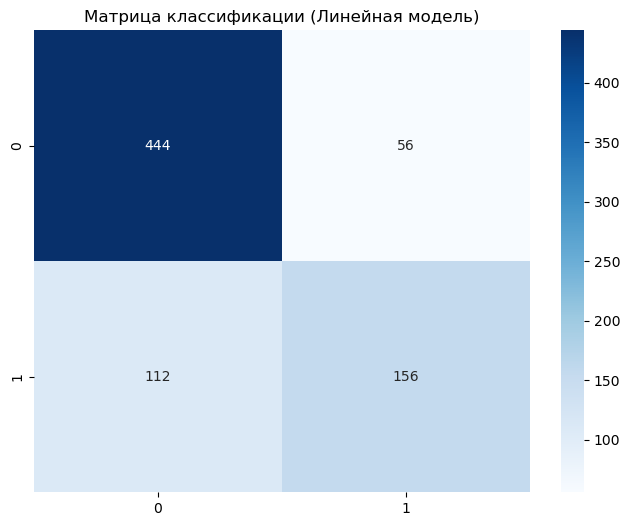


Точность модели: 0.78125


In [14]:
# Ячейка 6: Оценка линейной модели
y_pred = logistic.predict(X)

print("Матрица классификации:")
display(metrics.confusion_matrix(y, y_pred))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Матрица классификации (Линейная модель)")
plt.show()

print("\nТочность модели:", metrics.accuracy_score(y, y_pred))

In [20]:
# Ячейка 7: Полиномиальная модель
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

polynomial = LogisticRegression(max_iter=1000)
polynomial.fit(X_poly, y)
y_pred_poly = polynomial.predict(X_poly)

print("Размерность полиномиальных признаков:", X_poly.shape)

Размерность полиномиальных признаков: (768, 45)


C:\Users\senpai_sqrt2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Матрица классификации (Полиномиальная модель):


array([[452,  48],
       [112, 156]], dtype=int64)

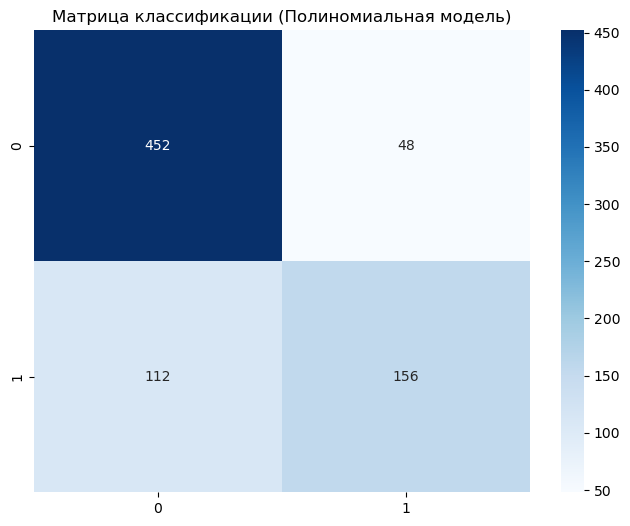


Точность полиномиальной модели: 0.7916666666666666


In [18]:
# Ячейка 8: Оценка полиномиальной модели
print("Матрица классификации (Полиномиальная модель):")
display(metrics.confusion_matrix(y, y_pred_poly))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(y, y_pred_poly), annot=True, fmt='d', cmap='Blues')
plt.title("Матрица классификации (Полиномиальная модель)")
plt.show()

print("\nТочность полиномиальной модели:", metrics.accuracy_score(y, y_pred_poly))